In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [2]:
import os

data = pd.read_csv(r"C:\Users\aditya\Desktop\Pregrad\Pregrad_august\Dataset\Algerian_forest_fires_cleaned_dataset.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [4]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
data = data.drop(['day', 'month', 'year', 'Region'], axis=1)

In [7]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [8]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

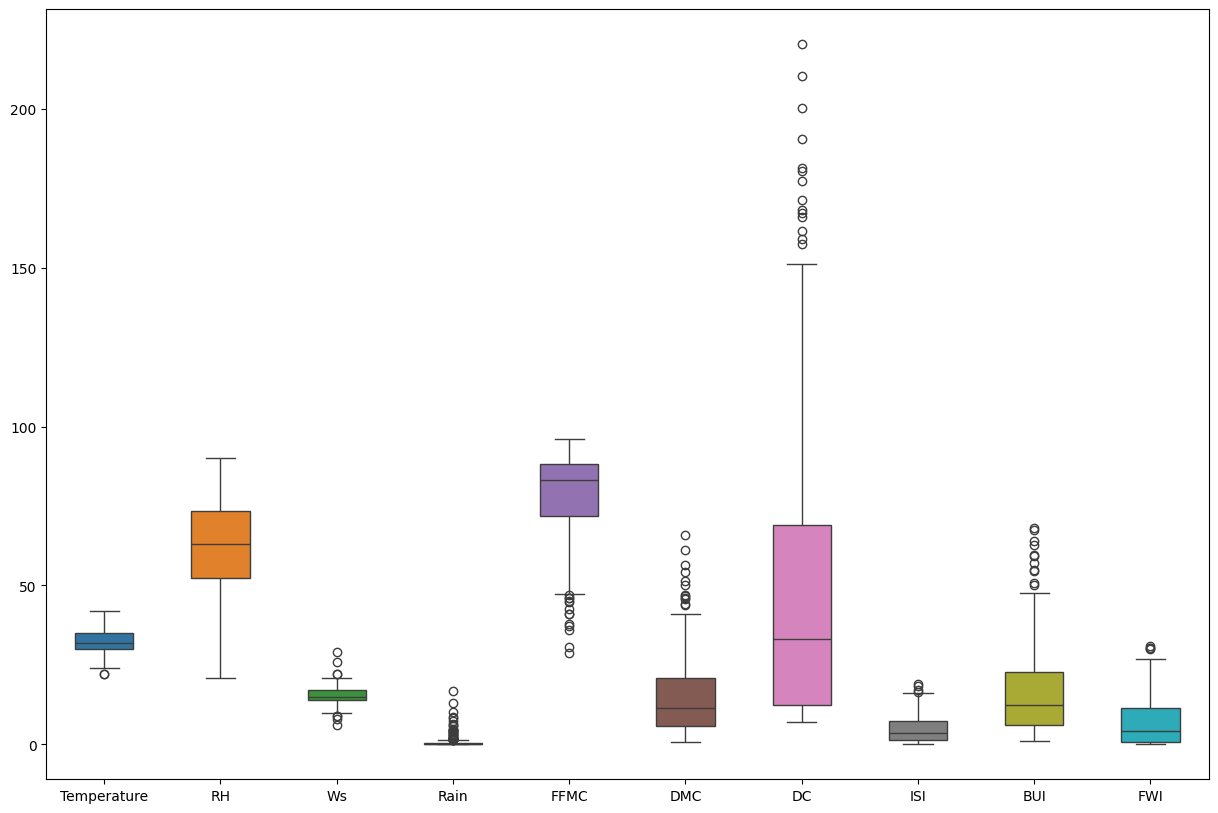

In [9]:
# Assuming 'data' is a DataFrame
fig, ax = plt.subplots(figsize=(15, 10))

# Correcting the code by removing 'fillersize' and adjusting valid parameters
sns.boxplot(data=data, width=0.5, ax=ax)

plt.show()

In [10]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [11]:
data['Ws'] = data['Ws'].replace(0,data['Ws'].mean)
data['Rain'] = data['Rain'].replace(0,data['Rain'].mean)
data['FFMC'] = data['FFMC'].replace(0,data['FFMC'].mean)
data['DMC'] = data['DMC'].replace(0,data['DMC'].mean)
data['DC'] = data['DC'].replace(0,data['DC'].mean)
data['ISI'] = data['ISI'].replace(0,data['ISI'].mean)
data['BUI'] = data['BUI'].replace(0,data['BUI'].mean)
data['FWI'] = data['FWI'].replace(0,data['FWI'].mean)

In [12]:
data.describe()

,Temperature,RH,Ws,FFMC,DMC,DC,BUI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,77.842387,14.680658,49.430864,16.690535
std,3.628039,14.828160,2.811385,14.349641,12.393040,47.665606,14.228421
min,22.000000,21.000000,6.000000,28.600000,0.700000,6.900000,1.100000
25%,30.000000,52.500000,14.000000,71.850000,5.800000,12.350000,6.000000
50%,32.000000,63.000000,15.000000,83.300000,11.300000,33.100000,12.400000
75%,35.000000,73.500000,17.000000,88.300000,20.800000,69.100000,22.650000
max,42.000000,90.000000,29.000000,96.000000,65.900000,220.400000,68.000000


In [13]:
X = data.drop(columns=['Classes'])
y = data['Classes']

In [14]:
print(y.dtype)

object


In [15]:
y = y.str.strip()  # Remove leading/trailing whitespace
y = y.map({'fire': 1, 'not fire': 0})  # Map categories to integers

In [16]:
print(y.isnull().sum())  # Check for missing values
print(y.unique())  # Check unique values

0
[0 1]


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [19]:
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

In [20]:
y_train.shape, y_test.shape

((182,), (61,))

In [34]:
from pathlib import Path

# Rstandard Scaling - Standardization
def scaler_standard(X_train, X_test):
    #Scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Saving the model
    file = open(r'C:\Users\aditya\Desktop\Pregrad\Pregrad_august\Model\standardScaler.pkl', 'wb')
    pickle.dump(scaler, file)
    file.close()

    return X_train_scaled, X_test_scaled

In [36]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [37]:
X_train_scaled

array([[ 1.01365171, -1.8394432 , -0.88892151, ...,  0.82966632,
         0.53411212,  0.7278858 ],
       [ 0.47735924,  0.64088224, -0.54024971, ..., -0.93132657,
        -0.8671673 , -0.93868129],
       [ 1.81809043, -1.8394432 ,  0.50576569, ...,  0.14874907,
        -0.39803445, -0.03455178],
       ...,
       [-0.32707948, -0.46873704, -1.58626511, ..., -0.72000743,
        -0.72030832, -0.75650594],
       [-0.32707948,  0.44506707, -0.54024971, ..., -0.24258268,
        -0.17366657, -0.21672713],
       [-0.05893324, -0.86036737,  0.85443749, ...,  2.26976718,
         0.78499621,  1.79394897]])

In [38]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-3, 3, 7),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear']
}

In [40]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,
                   param_grid = parameters,
                   scoring="accuracy",
                   cv=10)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [41]:
clf.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [42]:
clf.best_score_

0.9833333333333334

In [43]:
y_pred = clf.predict(X_test_scaled)

In [45]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[26,  0],
       [35,  0]], dtype=int64)

In [46]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [58]:
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
Accuracy

0.4262295081967213

In [59]:
Precision = true_positive / (true_positive + false_positive)
Precision

1.0

In [60]:
Recall = true_positive / (true_positive + false_negative)
Recall

0.4262295081967213

In [61]:
F1_score = 2*(Recall * Precision)/(Recall + Precision)
F1_score

0.5977011494252873

In [62]:
import pickle
file = open(r'C:\Users\aditya\Desktop\Pregrad\Pregrad_august\Model\modelForPrediction.pkl', 'wb')
pickle.dump(log_reg,  file)
file.close()